In [1]:
# setting up the libraries

import laspy
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from shapely import wkt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [2]:
# Reading the files
las_file_list = []
path = "C:\\Users\\User\\Desktop\\lidar_processing\\looptest\\"

In [3]:
# View contents of the path, we will see plus an ASCII file
files = os.listdir(path)
files

['classified_lidar_0000000.las',
 'classified_lidar_0000001.las',
 'classified_lidar_0000002.las',
 'classified_lidar_0000003.las',
 'classified_lidar_0000004.las',
 'classified_lidar_0000005.las',
 'classified_lidar_0000006.las',
 'classified_lidar_0000007.las',
 'classified_lidar_0000008.las',
 'classified_lidar_0000009.las',
 'classified_lidar_0000010.las']

In [4]:
# reading the las file
listti=[]
for file in files:
    if file.endswith(".las"):
        listti.append(path+file)

       

In [13]:
listti

['C:\\Users\\User\\Desktop\\lidar_processing\\looptest\\classified_lidar_0000000.las',
 'C:\\Users\\User\\Desktop\\lidar_processing\\looptest\\classified_lidar_0000001.las',
 'C:\\Users\\User\\Desktop\\lidar_processing\\looptest\\classified_lidar_0000002.las',
 'C:\\Users\\User\\Desktop\\lidar_processing\\looptest\\classified_lidar_0000003.las',
 'C:\\Users\\User\\Desktop\\lidar_processing\\looptest\\classified_lidar_0000004.las',
 'C:\\Users\\User\\Desktop\\lidar_processing\\looptest\\classified_lidar_0000005.las',
 'C:\\Users\\User\\Desktop\\lidar_processing\\looptest\\classified_lidar_0000006.las',
 'C:\\Users\\User\\Desktop\\lidar_processing\\looptest\\classified_lidar_0000007.las',
 'C:\\Users\\User\\Desktop\\lidar_processing\\looptest\\classified_lidar_0000008.las',
 'C:\\Users\\User\\Desktop\\lidar_processing\\looptest\\classified_lidar_0000009.las',
 'C:\\Users\\User\\Desktop\\lidar_processing\\looptest\\classified_lidar_0000010.las']

In [5]:
df_list = []

for data in listti:
    las = laspy.read(data)
    point= np.array((las.x, las.y,las.z,las.intensity)).transpose()
    points_df = pd.DataFrame(point)
    a= point
    points_df["Latitude"] = a[:,0]
    points_df["Longitude"] = a[:,1]
    points_df["Altitude"] = a[:,2]
    points_df["Intensity"] = a[:,3]
    

    df_list.append(points_df)

In [15]:
df_list

[                  0           1      2     3    Latitude   Longitude  \
 0        135292.640  454625.459  1.810  20.0  135292.640  454625.459   
 1        135293.880  454624.864  2.028  11.0  135293.880  454624.864   
 2        135292.706  454625.416  1.808  25.0  135292.706  454625.416   
 3        135293.535  454625.348  2.329   9.0  135293.535  454625.348   
 4        135292.771  454625.377  1.811  36.0  135292.771  454625.377   
 ...             ...         ...    ...   ...         ...         ...   
 4999995  135278.465  454608.357  3.021   2.0  135278.465  454608.357   
 4999996  135278.549  454608.518  3.193   4.0  135278.549  454608.518   
 4999997  135278.709  454608.530  3.360   0.0  135278.709  454608.530   
 4999998  135278.795  454608.677  3.527  15.0  135278.795  454608.677   
 4999999  135278.949  454608.706  3.696   1.0  135278.949  454608.706   
 
          Altitude  Intensity  
 0           1.810       20.0  
 1           2.028       11.0  
 2           1.808       2

In [6]:
xyzlist=[]
for data in df_list:
    xyzi_df = data[["Latitude", "Longitude", "Altitude", "Intensity"]]
    xyzlist.append(xyzi_df)

#xyzi_df.to_csv("wekacsv.csv", sep=" ", header=False, index=False)



In [7]:
def convert_to_shape(row):
        return wkt.loads("POINT (" + str(row["Latitude"]) + " " + str(row["Longitude"]) +" " + str(row["Altitude"]) + ")")

In [19]:
def filter_by_mean_value(data):
    
    #lanes_df = points_df[(points_df["Intensity"] >15)]
    #lanes_df=np.percentile(lanes_df["Altitude"], 65)
    #lanes_df=np.percentile(lanes_df["Altitude"], 25)
    lanes_df = data[data["Altitude"] <2]
    lanes_df = lanes_df[(lanes_df["Intensity"] >50)]
    #mean=lanes_df["Intensity"].mean()
    #std=lanes_df ["Intensity"].std()
    #lanes_df=lanes_df [lanes_df ["Intensity"]>mean +1 *std]
#     lanes_df =lanes_df [lanes_df["Intensity"]<mean +7 *std]

    
    return lanes_df

In [20]:
lanes_df1=[]
for data in xyzlist:
    
    
    lanes_df = filter_by_mean_value(data)
    lanes_df[['Latitude', 'Longitude', 'Altitude','Intensity']].to_csv("kidogo.csv", index=False,header=True)
    lanes_df['Shape'] = data.apply(convert_to_shape, axis=1)
    lanes_df1.append(lanes_df)
    





KeyboardInterrupt: 

In [8]:
## try to concatenate before clustering
lanes_df=pd.concat(lanes_df1)

NameError: name 'lanes_df1' is not defined

In [31]:
points = np.vstack((lanes_df.Latitude, lanes_df.Longitude, lanes_df.Altitude)).transpose()
#colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()
import pptk
import numpy as np

v = pptk.viewer(points)

In [139]:
for data in lanes_df1:
    f=data.describe()
    


,Latitude,Longitude,Altitude,Intensity
count,83738.000000,83738.000000,83738.000000,83738.000000
mean,135292.332924,454628.517949,1.916914,35.039349
std,1.948511,3.524441,0.058582,6.940728
min,135276.590000,454593.209000,1.467000,27.000000
25%,135291.365000,454625.947000,1.866000,29.000000
50%,135292.364000,454629.646000,1.925000,33.000000
75%,135293.310000,454630.438000,1.969000,39.000000
max,135312.506000,454642.532000,1.999000,79.000000


In [21]:
clusteri=[]
for data in lanes_df1:
    X = data[["Latitude", "Longitude", "Altitude"]].values
    X = StandardScaler().fit_transform(X)
    db = DBSCAN(eps=0.001, min_samples=5).fit(X)
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    data["Group"] = labels
    cluster_df = data[["Latitude", "Longitude", "Altitude", "Group"]]
    cluster_df = cluster_df[cluster_df["Group"]>=0]
    cluster_df.to_csv("cluster.xyz",index=False)
    clusteri.append(cluster_df)
    





In [22]:
maline=[]
for data in clusteri:
    lines = []
    for cluster in range( n_clusters_):
        sub_cluster_df = cluster_df[cluster_df["Group"] == cluster]
        points = sub_cluster_df[["Latitude","Longitude", "Altitude"]].values
        distances = squareform(pdist(points))
        for i in range(0,5):
            max_index = np.argmax(distances)
            i1, i2 = np.unravel_index(max_index, distances.shape)
            distances[i1,i2] = 0.0
        
        max_dist = np.max(distances)
        max_index = np.argmax(distances)
        i1, i2 = np.unravel_index(max_index, distances.shape)
        p1 = sub_cluster_df.iloc[i1]
        p2 = sub_cluster_df.iloc[i2]
        lines.append(([p1["Latitude"], p2["Latitude"]],[p1["Longitude"], p2["Longitude"]], [p1["Altitude"], p2["Altitude"]]))
    maline.append(lines) 
    




    
    
    
    
        
   

[([135292.707, 135292.706], [454625.391, 454625.39400000003], [1.804, 1.804]),
 ([135292.765, 135292.764], [454625.349, 454625.35000000003], [1.819, 1.819]),
 ([135292.758, 135292.758], [454625.341, 454625.346], [1.829, 1.829]),
 ([135290.949, 135290.951], [454628.957, 454628.956], [1.801, 1.801]),
 ([135290.992, 135290.991], [454629.068, 454629.071], [1.832, 1.832]),
 ([135290.99, 135290.989], [454629.01, 454629.011], [1.803, 1.803]),
 ([135291.153, 135291.153], [454629.25200000004, 454629.25], [1.899, 1.899]),
 ([135291.16700000002, 135291.165],
  [454629.13300000003, 454629.137],
  [1.811, 1.811]),
 ([135291.59100000001, 135291.593], [454631.25, 454631.246], [1.885, 1.885]),
 ([135291.181, 135291.182], [454629.124, 454629.12200000003], [1.811, 1.811]),
 ([135291.189, 135291.187], [454629.117, 454629.119], [1.811, 1.811]),
 ([135291.21, 135291.209], [454629.179, 454629.181], [1.825, 1.825]),
 ([135291.20500000002, 135291.206], [454629.099, 454629.098], [1.82, 1.82]),
 ([135291.233, 1

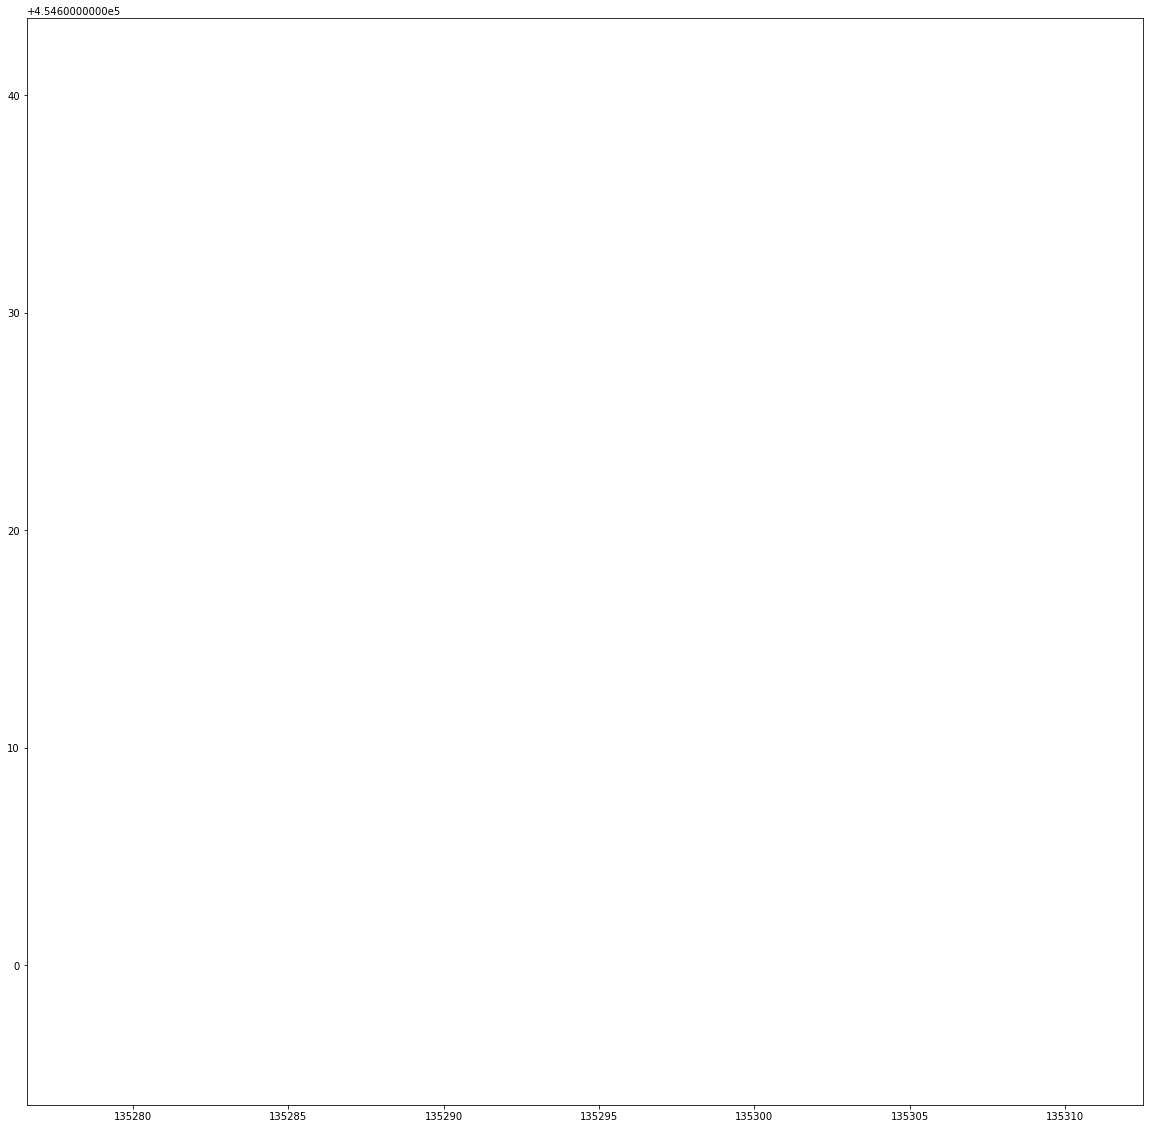

Number of prototype lane markings:  4523


In [24]:

plt.figure(figsize=(20,20))
plt.xlim(135276.5901, 135312.50600), plt.ylim(454593.569,454643.569)

for data in maline:
    for l in data:
        plt.plot(l[0], l[1], l[2])
plt.show()
    
    
    


print("Number of prototype lane markings: ", len(lines))

In [ ]:
plt.figure(figsize=(20,20))
plt.xlim(135276.5901, 135312.50600), plt.ylim(454593.569,454643.569)

for data in maline:
    for l in data:
        plt.plot(l[0], l[1], l[2])
plt.show()
    
    
    


print("Number of prototype lane markings: ", len(lines))

In [27]:
points = np.vstack((cluster_df.Latitude, cluster_df.Longitude, cluster_df.Altitude)).transpose()
#colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()
import pptk
import numpy as np

v = pptk.viewer(points)
#v.attributes(colors/65535)